In [16]:
# dill.load_session('notebook_env.ipynb')

# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

import dill

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

# Downloading NLTK data
# nltk.download('stopwords')   # Downloading stopwords data
# nltk.download('punkt')       # Downloading tokenizer data
# # print(nltk.data.path)
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize,sent_tokenize

In [6]:
# df = pd.read_csv('emails.csv', encoding='latin1')
df2 = pd.read_csv('./enron_data_fraud_labeled.csv')


/tmp/ipykernel_7583/3687554760.py:2: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./enron_data_fraud_labeled.csv')


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447417 entries, 0 to 447416
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Folder-User                447417 non-null  object 
 1   Folder-Name                447417 non-null  object 
 2   Message-ID                 447417 non-null  object 
 3   Date                       447417 non-null  object 
 4   From                       447417 non-null  object 
 5   To                         447417 non-null  object 
 6   Subject                    429397 non-null  object 
 7   Mime-Version               447417 non-null  object 
 8   Content-Type               447417 non-null  object 
 9   Content-Transfer-Encoding  447417 non-null  object 
 10  X-From                     447417 non-null  object 
 11  X-To                       439238 non-null  object 
 12  X-cc                       109637 non-null  object 
 13  X-bcc                      17

In [8]:
df2.head(3)
pd.set_option('display.max_columns', None)
df2.sample(5)

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Body,Cc,Bcc,Time,Attendees,Re,Source,Mail-ID,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Label
423781,maildir,mcconnell-m,<16955119.1075843909462.JavaMail.evans@thyme>,"Mon, 5 Feb 2001 01:59:00 -0800 (PST)",mike.mcconnell@enron.com,greg.whalley@enron.com,EGM - 2001 goals,1.0,text/plain; charset=us-ascii,7bit,Mike McConnell,Greg Whalley,"Liz M Taylor, Mark Frevert, Jeffrey A Shankman",NaN,\Mark_McConnell_June2001\Notes Folders\All doc...,MCCONNELL-M,mmcconn.nsf,"EGM 2001 goals Greg, I received request for ou...","['liz.taylor@enron.com', 'mark.frevert@enron.c...","liz.taylor@enron.com, mark.frevert@enron.com, ...",,,,Enron Data,43c344912da49a391115683dedf6d097b5198c2a3c4b4c...,False,False,Internal,784.0,False,False,0
193919,maildir,tycholiz-b,<17771088.1075852076837.JavaMail.evans@thyme>,"Thu, 26 Apr 2001 14:27:00 -0700 (PDT)",stephanie.miller@enron.com,eric.ledain@enron.com,ANG/Nova Expansions,1.0,text/plain; charset=us-ascii,7bit,Stephanie Miller <Stephanie Miller/ENRON@enron...,Eric LeDain <Eric LeDain/CAL/ECT@ECT>,Barry Tycholiz <Barry Tycholiz/NA/Enron@ENRON>,NaN,"\BTYCHOL (Non-Privileged)\Tycholiz, Barry\Inbox",TYCHOLIZ-B,BTYCHOL (Non-Privileged).pst,ANG/Nova Expansions Scott Yule advised that AN...,barry.tycholiz@enron.com,barry.tycholiz@enron.com,,,,Enron Data,d6e40fbccc553ec6d197151c268b3aa0d7ed8aa6eeebd0...,False,False,Internal,200.0,False,False,0
385394,maildir,stclair-c,<8360128.1075842083015.JavaMail.evans@thyme>,"Wed, 12 Apr 2000 06:52:00 -0700 (PDT)",carol.clair@enron.com,david.dupre@enron.com,"Re: Southern Company Services, Inc.",1.0,text/plain; charset=us-ascii,7bit,Carol St Clair,David P Dupre,NaN,NaN,\Carol_StClair_Dec2000_1\Notes Folders\All doc...,STCLAIR-C,cstclai.nsf,"Re: Southern Company Services, Inc. David: The...",,,,,,Enron Data,5aaebc912a13a5202a0eaae86ddf43bbd20353dd31f113...,False,False,Internal,1473.0,False,True,0
38123,maildir,bass-e,<3116621.1075854661753.JavaMail.evans@thyme>,"Mon, 11 Dec 2000 03:27:00 -0800 (PST)",noreply@ccomad3.uu.commissioner.com,,Commissioner.COM E-Reports for The Perfect Lea...,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,"""Commissioner.COM"" <noreply@ccomad3.uu.commiss...","undisclosed-recipients:,",NaN,NaN,\Eric_Bass_Dec2000\Notes Folders\Notes inbox,Bass-E,ebass.nsf,Commissioner.COM E-Reports for The Perfect Lea...,,,,,,Enron Data,167584270cc40c020250889024e59858a863f53b8ccce9...,False,False,External,740.0,False,False,0
87061,maildir,lenhart-m,<15250706.1075858138412.JavaMail.evans@thyme>,"Thu, 3 May 2001 05:47:00 -0700 (PDT)",kevin.a.boone@accenture.com,"matthew.lenhart@enron.com, mmmarcantel@equiva....",funny,1.0,text/plain; charset=us-ascii,7bit,kevin.a.boone@accenture.com,"Matthew.Lenhart@enron.com, MMMarcantel@equiva....",NaN,NaN,\Matthew_Lenhart_Jun2001\Notes Folders\Notes i...,Lenhart-M,mlenhar.nsf,funny If Suzy were married this might be appli...,,,,,,Enron Data,837ba04c8a0a7c5f14fc9d80026b9dba8b6ad0a2e44c14...,False,False,External,34.0,False,False,0


In [9]:
df2.isnull().sum()

Folder-User                       0
Folder-Name                       0
Message-ID                        0
Date                              0
From                              0
To                                0
Subject                       18020
Mime-Version                      0
Content-Type                      0
Content-Transfer-Encoding         0
X-From                            0
X-To                           8179
X-cc                         337780
X-bcc                        447240
X-Folder                          0
X-Origin                          0
X-FileName                     2690
Body                              0
Cc                                0
Bcc                               0
Time                              0
Attendees                         0
Re                                0
Source                            0
Mail-ID                           0
POI-Present                       0
Suspicious-Folders                0
Sender-Type                 

In [10]:
df2['Label'].value_counts()
newdf = df2.drop(columns = ['X-cc','X-bcc'])


In [11]:
newdf[['Message-ID','Body','Label']]

,Message-ID,Body,Label
0,<17334447.1075857585446.JavaMail.evans@thyme>,Status John: I'm not really sure what happened...,0
1,<19171686.1075857585034.JavaMail.evans@thyme>,re:summer inverses i suck-hope youve made more...,0
2,<29887033.1075857630725.JavaMail.evans@thyme>,"The WTI Bullet swap contracts Hi, Following th...",0
3,<2526360.1075857584903.JavaMail.evans@thyme>,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,0
4,<30102065.1075857630952.JavaMail.evans@thyme>,daily charts and matrices as hot links 5/15 Th...,0
...,...,...,...
447412,<20441369.1075863375765.JavaMail.evans@thyme>,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,0
447413,<18115560.1075863371090.JavaMail.evans@thyme>,Audit Committee Materials meeting Two meetings...,0
447414,<9719707.1075862189729.JavaMail.evans@thyme>,"Credit Story Rick/Bill/David, Generally, we ha...",0
447415,<13468574.1075863381452.JavaMail.evans@thyme>,Commodity Group Limit Issue In addition to the...,0


In [ ]:
# df.iloc[2,1].split('\n')

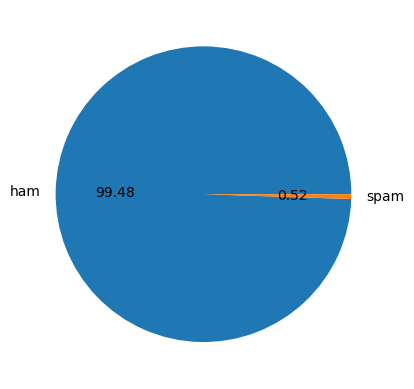

In [12]:
plt.pie(newdf['Label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [13]:
newdf.duplicated().sum()
newdf['num_chars'] = newdf['Body'].apply(len)
# newdf['num_words']

In [17]:
#number of words
# Ran word_tokenize() once :: 10mins
# newdf['num_words'] = newdf['Body'].apply(lambda x:len(word_tokenize(x)))
# with open('num_words.pkl','wb') as file:
#     dill.dump(newdf['num_words'],file)
    
with open('num_words.pkl','rb') as file:
    newdf['number_words'] = dill.load(file)

In [18]:
newdf['number_words']

0         129
1          60
2         201
3          34
4         224
         ... 
447412     29
447413     53
447414    276
447415    634
447416     25
Name: number_words, Length: 447417, dtype: int64

In [19]:
newdf['num_sentences'] = newdf['Body'].apply(lambda x:len(sent_tokenize(x)))
newdf['num_sentences']
newdf[['Label','Body','number_words','num_chars','num_sentences']]

,Label,Body,number_words,num_chars,num_sentences
0,0,Status John: I'm not really sure what happened...,129,592,9
1,0,re:summer inverses i suck-hope youve made more...,60,295,3
2,0,"The WTI Bullet swap contracts Hi, Following th...",201,1083,3
3,0,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,34,195,1
4,0,daily charts and matrices as hot links 5/15 Th...,224,1119,8
...,...,...,...,...,...
447412,0,Review Board Books w/Rebecca C./BillB/DaveG/Mi...,29,189,2
447413,0,Audit Committee Materials meeting Two meetings...,53,312,2
447414,0,"Credit Story Rick/Bill/David, Generally, we ha...",276,1453,10
447415,0,Commodity Group Limit Issue In addition to the...,634,3127,19


In [20]:
newdf[['number_words','num_chars','num_sentences']].describe()

,number_words,num_chars,num_sentences
count,447417.000000,4.474170e+05,447417.000000
mean,172.246046,8.930884e+02,7.729910
std,991.214676,5.357979e+03,33.317762
min,0.000000,1.000000e+00,0.000000
25%,25.000000,1.240000e+02,2.000000
50%,46.000000,2.320000e+02,3.000000
75%,112.000000,5.650000e+02,6.000000
max,246922.000000,1.401129e+06,3861.000000


In [21]:
newdf[newdf['Label'] == 0][['number_words','num_chars','num_sentences']].describe()

,number_words,num_chars,num_sentences
count,445090.000000,4.450900e+05,445090.000000
mean,171.883635,8.914541e+02,7.706181
std,993.658931,5.371312e+03,33.392881
min,0.000000,1.000000e+00,0.000000
25%,25.000000,1.240000e+02,2.000000
50%,46.000000,2.300000e+02,3.000000
75%,111.000000,5.600000e+02,6.000000
max,246922.000000,1.401129e+06,3861.000000


In [22]:
newdf[newdf['Label'] == 1][['number_words','num_chars','num_sentences']].describe()

,number_words,num_chars,num_sentences
count,2327.000000,2327.000000,2327.000000
mean,241.565105,1205.683713,12.268586
std,223.016687,1117.219694,11.441637
min,4.000000,23.000000,1.000000
25%,94.000000,492.000000,5.000000
50%,186.000000,928.000000,9.000000
75%,306.000000,1499.500000,15.000000
max,1905.000000,9058.000000,111.000000


In [23]:
import seaborn as sns
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

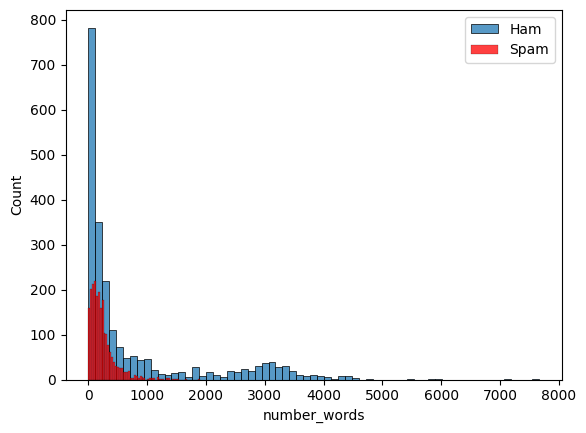

In [50]:
spam = newdf[newdf['Label'] == 1]
# print(spam['number_words'].value_counts())
ham = newdf[newdf['Label'] == 0]
# print(ham['number_words'][:800])
sns.histplot(ham['number_words'][:2200],label="Ham")
sns.histplot(spam['number_words'][:2200],label="Spam",color='red')
# plt.hist(ham['number_words'])
plt.legend()
plt.show()

In [44]:
ham['number_words'][:2000].describe()

count    2000.000000
mean      756.986500
std      1129.286055
min         0.000000
25%        64.750000
50%       222.500000
75%       779.750000
max      5456.000000
Name: number_words, dtype: float64

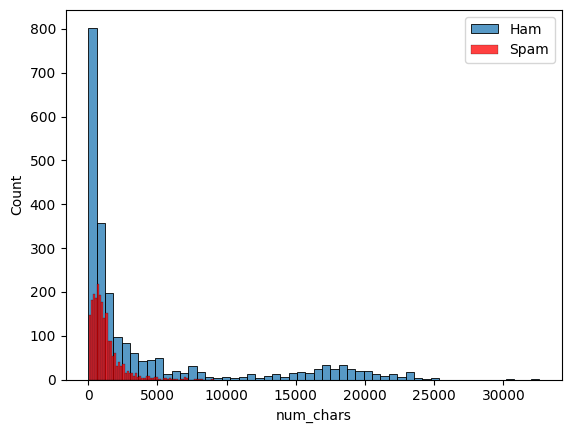

In [51]:
sns.histplot(ham['num_chars'][:2200],label="Ham")
sns.histplot(spam['num_chars'][:2200],label="Spam",color='red')
# plt.hist(ham['number_words'])
plt.legend()
plt.show()

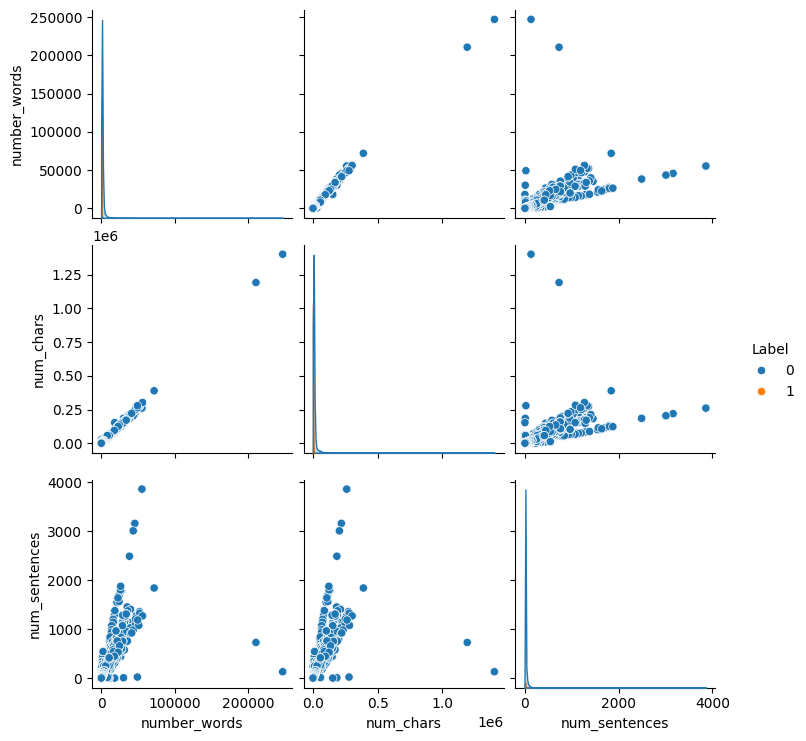

In [52]:
stats = newdf[['number_words','num_chars','num_sentences','Label']]
sns.pairplot(stats,hue='Label')

<Axes: >

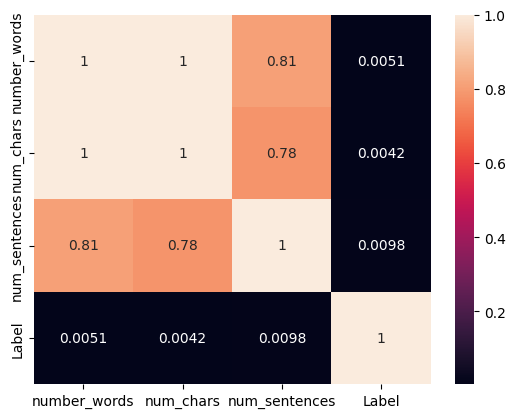

In [55]:
sns.heatmap(stats.corr(),annot=True)

In [ ]:
def transformText():
    pass